# Calculus Background


## Introduction

It so worth to revesit the basic calulus principles, even though they may have looked clear in school, in order to attempt at getting a more intuitive understanding of them.

At its most basic definition calculus deals with understanding change in a value that has a certain relation to another value. When something changes with respect to another something we have the beautiful simple notation of a function  $f(x)=y$  which is just a relation on how  $y$ changes when $x$ is changed.

That something can be anything where a relation is defined, for example how much one pays to rent a car each day vs how many days is he actually renting said car. If 1 day of driving costs 10€ but then increases with 10% on subsequent days (so for second day you pay 11€, on third day you pay 12.1€ and so on) we can find such a relation and express it as the following function  $f(x)=10∗(1+0.1)^x$ where $x$ can be any **positive natural number**. No one rents for half days or negative days. The more days passes, the more we have to pay.

In [4]:
%load_ext autoreload
%autoreload 2

import IPython

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)


from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from plot_sine import sine_plotter
sine_plotter()


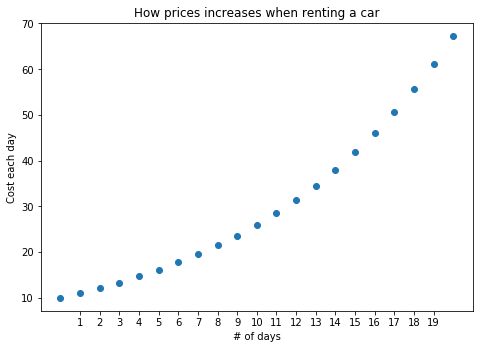

In [0]:
from matplotlib import pyplot
import numpy as np
import math
from ipywidgets import *
from IPython.display import display

%matplotlib inline

def f(x):
    return 10 * np.power((1 + 0.1), x)

def plot():
  x = np.arange(0, 21, 1)
  y = np.array(list(map(f, x)))
  fig = pyplot.figure()
  ax = fig.add_axes([0, 0, 1, 1])
  ax.plot(x, y, "o")
  ax.set_title("How prices increases when renting a car")
  pyplot.xlabel("# of days")
  pyplot.ylabel("Cost each day")
  pyplot.xticks(np.arange(1, 20, 1))
  pyplot.show()

plot()


Having such a function can be helpful if we want to analyze this behavior. For instance, a question we might have is how much we have to pay in total if we rent for 10 days. So we do a sum of $f(1)$ up to $f(10)$ and get the result.



In [0]:
sum = 0
for i in range(1, 10):
  sum += f(1)
print("For 10 days the price would end up to be " + str(sum) + "€.")

For 10 days the price would end up to be 99.0€.


Another question is how bit is the change from one day to another? How much do I have to pay in day 6 compared to day 5? Which, matematically, we can write as $f(6) - f(5)$.

In [0]:
print ("The change from day 5 to day 6 is " + str(f(6) - f(5)) + "€")

The change from day 5 to day 6 is 1.6105100000000014€


How about finding this rate of change between all days? So that would just create a new function with all the differences between any 2 neighbouring points.

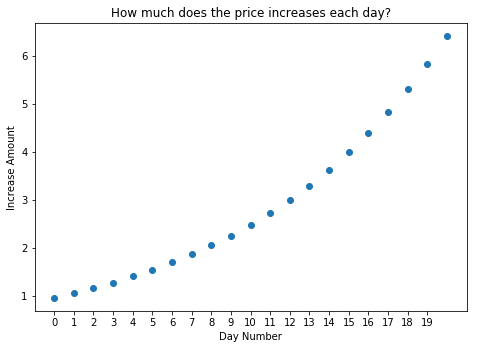

In [0]:
def df(x):
  return (f(x) - f(x-1) + f(x+1) - f(x)) / 2

def plot_df():
  x = np.arange(0, 21, 1)
  y = np.array(list(map(df, x)))
  fig = pyplot.figure()
  ax = fig.add_axes([0, 0, 1, 1])
  ax.plot(x, y, "o")
  ax.set_title("How much does the price increases each day?")
  pyplot.xlabel("Day Number")
  pyplot.ylabel("Increase Amount")
  pyplot.xticks(np.arange(0, 20, 1))
  pyplot.show()

plot_df()


We got ourselves a new function that just happens to be similar to the initial one which is a neat trait of many exponential functions but that is for another time.

Other types of questions that we can ask ourselves are of the type *how many days do I have to rent a car to pay at least a sum equal to X?*, *is there a saturation when the price stops increasing?* and so on. Basic math got us so far and would keep helping us as long as we work with such a function, defined over the positive natural numbers. That's also the reason all these graphs have dots rather than lines. But still, they are functions nevertheless.

Let's now move to a more interesting, continous functions. Assuming we throw a ball in the air, it will have a high initial velocity that as it climbs the altitude it slows down, getting to a complete stop in the air and then thanks to the gravitational acceleration it will start going faster towards Earth. If we want to plot the velocity of this ball over time we might use a quadratic functions $f(t) = at^2 + bt + c$ where we plug in $a$ the gravitation acceleration $-9.8m/s^2$, in $b$ the initial velocity of the ball, let's say $20m/s$ (this is super high) and in $c$ the initial height so let's put $1m$. So we end up with the function $f(t)  = -9.8t^2 + 20t + 1$. This function will map a certain moment in time to the height of the ball. We can plot this relation of time and height over a period of apx. $2.1s$. Getting to this number means [finding the root square of the quadratic function](https://www.wolframalpha.com/input/?i=-9.8t%5E2+%2B+20t+%2B+1) but that is not important here.

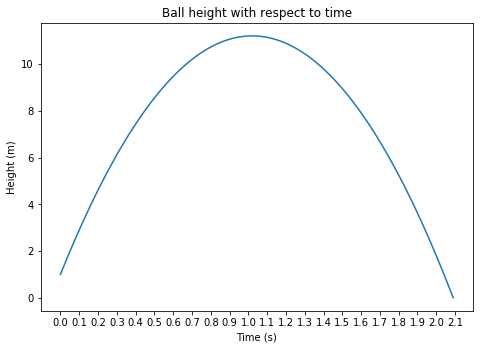

In [0]:
def qf(t):
  r = -9.8*(t**2) + 20*t + 1
  if r < 0: return 0; #acts as a boundary conditions: forces the value to be over 0 (so no negative heights)
  return r

def plot_qf():
  x = np.arange(0, 2.1, 0.01) #2.1 is actually over the root square of the quadratic function which is ~2.08965 but good enough if we enforce a boundary condition on it
  y = np.array(list(map(qf, x)))
  fig = pyplot.figure()
  ax = fig.add_axes([0, 0, 1, 1])
  ax.plot(x, y)
  ax.set_title("Ball height with respect to time")
  pyplot.xlabel("Time (s)")
  pyplot.ylabel("Height (m)")
  pyplot.xticks(np.arange(0, 2.11, 0.1))
  pyplot.show()

plot_qf()

We can already see a major difference compared with the previous relation: there are not independent points but rather all the points are connected through a curve. Trying to find the change between 2 time steps is still easy, it just means $f(t_1) - f(t_2)$ and that will give us the height difference but trying to find the change between *two neighbourhing points* is already non trivial. What is the next time after $1s$? $1.1s?$ $1.01s$? No matter the number one can find a smaller number closer to $1$. 

To solve this we have two main options:
1. Find out what is the minimum accuracy we need, estimate this curve with an approximated curve at an even higher accuracy and solve it..
2. Try to solve it in the infinitesimal number domain.





## Working with a higher accuracy

For option 1, if one is interesting in the results but doesn't care of precisions under milimeters we can just look at points that are at most $0.1mm$  away from each other and find any solution we need. For example a question could be *What is the speed at $t=0.4$?*. 

In order to find a speed in an instant we select one previous points, find the distance difference and divide that by the time lapsed.

$$s  =\dfrac{f(t_2) - f(t_1)}{t_2 - t_1}$$

In our case, we already know that $t_2 = 0.4$ as initial constraint and because we know the accuracy has to be somewhere around milimeter level we need to pick a $t_1$ such as $f(t_2) - f(t_1) < 0.1 mm$.

We don't necesarry need to solve exactly for this solution, we can even guess the $t_1$ or even easier we can pick a random $\epsilon$ (that is epsilon symbol) that is *small enough* to satisfy this condition and for all means we can consider it as being *almost* zero but not quite so therefore our equation becomes

$$  s = \dfrac{f(t) - f(t - \epsilon)}{t - t - \epsilon} = \dfrac{f(t) - f(t - \epsilon)}{- \epsilon} $$

Let's consider a very small $\epsilon$ (maybe 0.0001) and see the speed we get for $t=0.4$

$$  s = \dfrac{f(0.4) - f(0.4 - 0.0001)}{-0.0001} $$


In [0]:
def find_speed(t, epsilon):
  return (qf(t) - qf(t-epsilon)) / epsilon

print (str(find_speed(0.4, 0.0001)) + " m/s is the speed at t=0.4")

12.160979999986665 m/s is the speed at t=0.4


Roughly 12 m/s is our speed. Neat. How about if we want even higher accuracy? Maybe  $\epsilon = 1e{-9}$?

In [0]:
print (str(find_speed(0.4, 1e-9)) + " m/s is the speed at t=0.4")

12.159999229766072 m/s is the speed at t=0.4


We get even a better accuracy. How high can we get? Let's see an acurracy chart starting with epsilon from 0.1 **as it aproaches 0**.

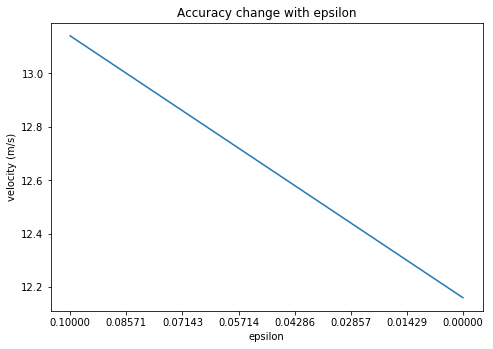

In [0]:
def plot_speed_epsilon():
  x = np.linspace(0.1, 0.0000001, num = 1000)
  y = [find_speed(0.4, e) for e in x]
  fig = pyplot.figure()
  ax = fig.add_axes([0, 0, 1, 1])
  ax.plot(x, y)
  ax.set_title("Accuracy change with epsilon")
  pyplot.xlabel("epsilon")
  pyplot.ylabel("velocity (m/s)")
  pyplot.xticks(np.linspace(0.1, 0.0000001, num=8))
  pyplot.gca().invert_xaxis()
  pyplot.show()

plot_speed_epsilon()

There is clearly some change happening here. We can see that closer we get our $\epsilon$ towards zero the values tends to go towards some closer to $12.1 m/s$. But what happens at 0? Well at 0 we get the following equation:

$$  s = \dfrac{f(0.4) - f(0.4 - 0)}{0} $$

So now we can get our *most accurate* value. Except that we have to divide by $0$ which is a bit problematic. Obviously we never quite reach 0 but there is a mathematical way of saying that we go as close as possible to $0$, so close that we can't necesary say which number it is but we know is enough for us. We call that **limit**. The notation would be

$$ \lim_{x \to 0} \dfrac{f(t) - f(t-x)}{-x} $$

which just means that we pick a $x$ very, very close to 0 and get the result just like it would be 0 altough we clearly couldn't otherwise calculate it directly. If we evaluate this limit with $t=0.4$ we'll find an answer of exactly $12.16m/s$. If we evaluate this generally for any $t$ we get the result of $20 - 19.6t$. Using this formula we could maybe plot the velocity over the full function.



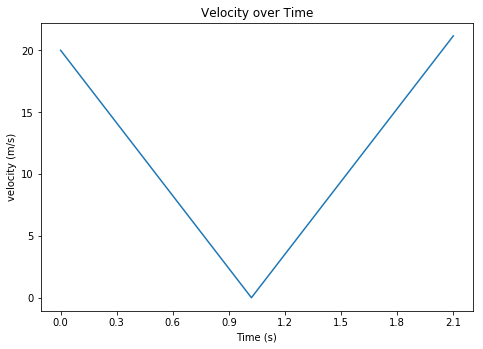

In [0]:
def compute_limit(t):
  return abs(20-19.6*t)

def plot_velocity_limits():
  x = np.linspace(0, 2.1, num = 250)
  y = [compute_limit(t) for t in x]
  fig = pyplot.figure()
  ax = fig.add_axes([0, 0, 1, 1])
  ax.plot(x, y)
  ax.set_title("Velocity over Time")
  pyplot.xlabel("Time (s)")
  pyplot.ylabel("velocity (m/s)")
  pyplot.xticks(np.linspace(0, 2.1, num=8))
  pyplot.show()

plot_velocity_limits()

As we expect, we see the acceleration linearly decreasing from the initial $20m/s$ towards $0$ where it reaches the point of maximum height and then thanks to gravity accelerates back to a over $20m/s$ going towards the ground. The reason why we go over the initial velocity is that the ball as thrown from $1m$ height which has some potential energy and gets converted into even more velocity.

Quickly we can again repeat this process to see the differences between velocities. A difference between two velocities will give us the acceleration. Our velocity function is $f(x) = 20-19.6t$ and to check the difference using the same very small epsilon which gets written as a limit we'll get:

$$ \lim_{x \to 0} \dfrac{20-19.6t - 20-19.6(t-x)}{-x} $$

Of course, we are in the same situation now where we have to divide by $0$ but having a limit allows us to work very very close to that 0 and <a href="https://www.wolframalpha.com/input/?i=lim+((a-b*t)+-+(a-b*(t-x)))%2Fx,+x-%3E0">solve it</a> which will yield the result of $19.6$. If we divide by $2$ we get $9.8$ which just so happens to be the value we've initially used for gravitational acceleration and that is indeed the acceleration of our ball.

We could redo all these calculations entierly with variables so we can understand how they are related between eachother and deduce general formulas which are well known and usually used in school.

As a conclusion to limits, they help us analyse solutions for cases where it might seem impossible, like in our case, divisions by 0. How they do it? But tricking us that we do work with infinitesimal numbers, with infinities but we don't actually do that, we just reduce the accuracy to be *good enough* for our cases.

And yes, this whole chapter was dedicated to limits.

## Working in the infinitesimal domain

We've seen how we can work with a function with continous values (so defined over an infinite number of values) by trying to find an accuracy high enough that will fit our requirements. We did this by approximating the differences between two infinitely close values with an epsilon which is very close to $0$ but not quite so. A neat trick.

Let's have a look at a second way of approaching the same problem as before. Using the same initial conditions of a ball being thrown with $20m/s$ from $1m$ let's do the same plot of height:

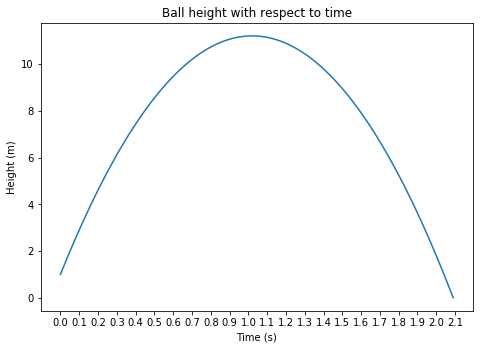

In [0]:
plot_qf()

Again, we want to see what is the velocity of the ball at $t=0.4$. We already know how to do this with epsilon but how about doing it *without any approximation*. We know we can't really do this directly from the previous sections but maybe there is some kind of different universe with a different kind of dimensions where this is possible.